# Hello, Docker

# Libraries & Constant

In [1]:
#Paths to data and bins files
path = "data_folder"
bin_path = "bins_folder"

In [2]:
#General purpose
import pandas as pd

#Preprocessing
from sklearn import preprocessing

#Model
from sklearn.neural_network import MLPClassifier

#Metrics
from sklearn.metrics import classification_report

#Export
import joblib

# Import data

In [3]:
#Import train file
df = pd.read_csv(path+"\\train.csv")
df.head()

,Line,# Letter,Cz/theta,Cz/alpha,Cz/betaL,Cz/betaH,Cz/gamma,Fz/theta,Fz/alpha,Fz/betaL,...,F8/theta,F8/alpha,F8/betaL,F8/betaH,F8/gamma,Fp2/theta,Fp2/alpha,Fp2/betaL,Fp2/betaH,Fp2/gamma
0,0,0,0.946,0.454,0.810,1.152,0.328,3.354,0.774,1.313,...,2.021,2.161,2.564,4.582,5.185,2.267,0.170,1.449,2.684,7.827
1,1,0,0.695,0.408,0.778,1.070,0.331,3.612,0.686,1.798,...,2.018,1.598,2.572,4.422,5.087,2.062,0.314,1.606,2.401,7.633
2,2,0,0.515,0.425,0.719,1.086,0.329,2.583,0.481,1.836,...,2.115,1.629,2.245,4.220,4.955,2.000,0.578,1.448,2.226,7.464
3,3,0,0.502,0.405,0.614,1.111,0.326,1.719,0.386,1.664,...,2.260,2.330,2.155,4.207,4.891,2.655,0.931,1.314,2.112,7.459
4,4,0,0.610,0.401,0.509,1.086,0.359,1.745,0.703,1.703,...,2.515,3.254,2.775,4.440,4.954,3.407,1.377,1.615,2.059,7.520


In [4]:
#Import test file
df_test = pd.read_csv(path+"\\test.csv")

# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Columns: 162 entries, Line to  Fp2/gamma
dtypes: float64(160), int64(2)
memory usage: 1.6 MB


In [6]:
#Check target
df['# Letter'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int64)

<AxesSubplot:>

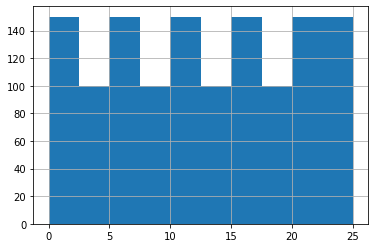

In [7]:
#Check target balance
df['# Letter'].hist()

<AxesSubplot:>

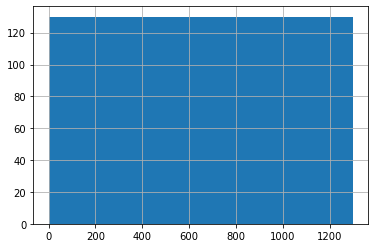

In [8]:
#Check if this feature is useful
df['Line'].hist()

# ETL

In [9]:
#Drop not necessary feature
df.drop('Line',axis=1,inplace=True)
df_test.drop('Line',axis=1,inplace=True)

In [10]:
#Differentiate features and target
y_train = df['# Letter'].values
X_train = df.drop('# Letter', axis = 1)

In [11]:
print(X_train.shape)
print(y_train.shape)

(1300, 160)
(1300,)


In [12]:
# Data normalization (0,1)
X_train = preprocessing.normalize(X_train, norm='l2')

# Model

In [13]:
# Neural Networks multi-layer perceptron (MLP) algorithm
clf_NN = MLPClassifier(solver='adam', 
                       activation='logistic', 
                       alpha=0.001, 
                       hidden_layer_sizes=(500,), 
                       random_state=0, 
                       max_iter=1000)

In [14]:
clf_NN.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', alpha=0.001, hidden_layer_sizes=(500,),
              max_iter=1000, random_state=0)

# Metrics

In [15]:
#Prepare test data
y_test = df_test['# Letter'].values
X_test = df_test.drop('# Letter', axis = 1)

In [16]:
X_test = preprocessing.normalize(X_test, norm='l2')

In [17]:
y_pred = clf_NN.predict(X_test)

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.98      0.83        50
           1       1.00      0.62      0.77        50
           2       0.90      0.86      0.88        50
           3       0.08      0.10      0.09        50
           4       0.33      0.08      0.13        50
           5       0.37      0.40      0.38        50
           6       0.71      0.78      0.74        50
           7       0.16      0.20      0.18        50
           8       0.40      0.56      0.47        50
           9       0.50      0.58      0.54        50
          10       0.52      0.32      0.40        50
          11       0.55      0.54      0.55        50
          12       0.74      0.68      0.71        50
          13       0.68      0.76      0.72        50
          14       0.45      0.26      0.33        50
          15       0.05      0.04      0.04        50
          16       0.00      0.00      0.00        50
          17       0.88    

# Export

In [19]:
#Para guardar el modelo sin tener que reentrenar
joblib.dump(clf_NN, bin_path+'\\NN_model.pkl')

['D:\\NTT\\HelloDocker\\FirstDocker\\bin\\NN_model.pkl']